<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/time_series_take_four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Loading the data

data = pd.read_csv('/content/monthly-milk-production-pounds.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Month                                     168 non-null    object
 1   Monthly milk production (pounds per cow)  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [5]:
data.describe()

,Monthly milk production (pounds per cow)
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [6]:
data.head()

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [7]:
data.columns = ['Month', 'Milk in pounds per cow']

In [8]:
data.head()

,Month,Milk in pounds per cow
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [9]:
data['Month'].nunique()

168

In [10]:
data = data[~data['Month'].str.contains('\?')]

In [11]:
data['Month'] = pd.to_datetime(data['Month'])

In [12]:
data.set_index('Month', inplace=True)

In [13]:
data.head()

,Milk in pounds per cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


## **AR Model**
Autoregressive (AR) Model: The Autoregressive (AR) model is a linear regression model that uses past values of the time series itself as predictors for future values. Application: AR models are useful for capturing temporal dependencies in the data, such as trends and cyclic patterns. They are commonly used in finance for modeling stock prices, in economics for macroeconomic forecasting, and in meteorology for weather prediction.

This type of analysis is used when there is a correlation between the time series values and their preceding and succeeding values.

x(t) = c + theta.x(t-1) + epsilon(noise)

In [14]:
data.tail()

,Milk in pounds per cow
Month,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


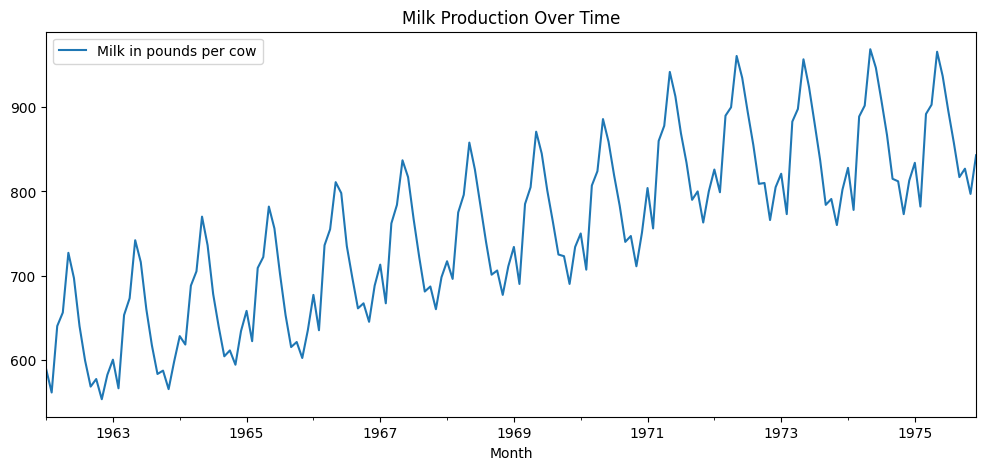

In [15]:
data.plot(figsize=(12, 5))
plt.title('Milk Production Over Time')
plt.show()

### **Stationerity**

In [16]:
import statsmodels.tsa.stattools as sts

In [17]:
adf_results = sts.adfuller(data)

In [18]:
adf_statistic = adf_results[0]
p_value = adf_results[1]
usedlag = adf_results[2]
nobs = adf_results[3]
critical_values = adf_results[4]
icbest = adf_results[5]

In [19]:
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Number of Lags Used:', usedlag)
print('Number of Observations Used:', nobs)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'\t{key}: {value}')

ADF Statistic: -1.3038115874221308
p-value: 0.6274267086030311
Number of Lags Used: 13
Number of Observations Used: 154
Critical Values:
	1%: -3.473542528196209
	5%: -2.880497674144038
	10%: -2.576878053634677


### **Decomposition**

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
decomp = seasonal_decompose(data, model='additive')

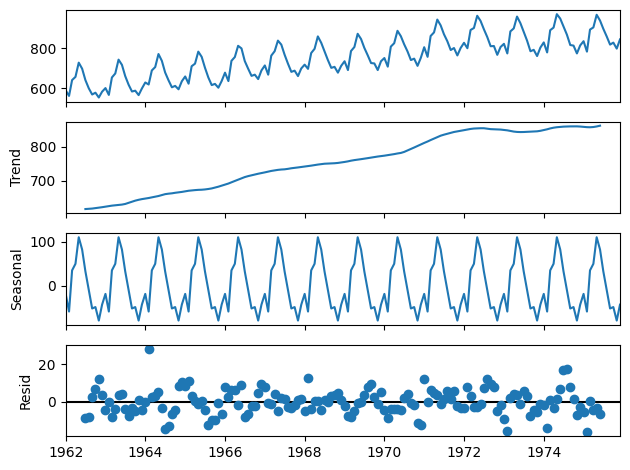

In [22]:
decomp.plot()
plt.show()

In [23]:
mul_decompose = seasonal_decompose(data, model='multiplicative')

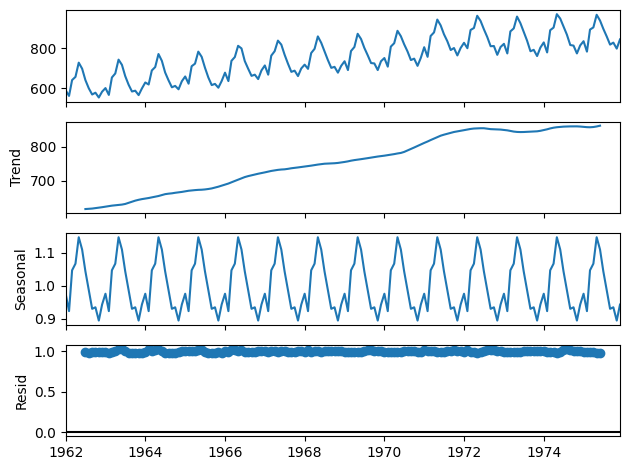

In [24]:
mul_decompose.plot()
plt.show()

**Selecting the number of lags**

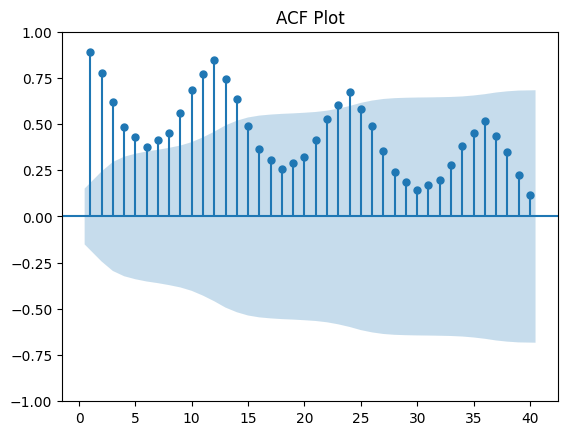

In [25]:
sgt.plot_acf(data, lags=40, zero=False)
plt.title('ACF Plot')
plt.show()

**PACF Plot**

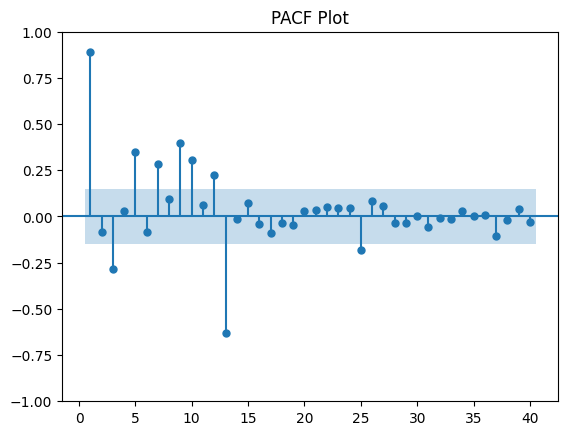

In [26]:
sgt.plot_pacf(data, lags=40, zero=False)
plt.title('PACF Plot')
plt.show()

Explanation of the ACF and PACF Plots
1. ACF (Autocorrelation Function) Plot:
Purpose: The ACF plot shows the correlation of the time series with itself at different lags. It tells you how much the current value of the series is related to its past values.
X-axis: Represents the lag number.
Y-axis: Represents the correlation coefficient, which ranges from -1 to 1.
Interpretation:
A high positive correlation at a specific lag indicates that the time series values at that lag are closely related to each other.
The blue shaded region represents the confidence interval. Any spikes outside this region are considered statistically significant.
If the ACF decreases gradually, it indicates the presence of a trend in the data.
If there’s a strong ACF at lag 1 and it tapers off quickly, this could indicate an AR (Autoregressive) process.
2. PACF (Partial Autocorrelation Function) Plot:
Purpose: The PACF plot shows the correlation of the time series with itself at different lags, after removing the effects of earlier lags. Essentially, it measures the correlation between the series and its lag, after accounting for the correlations at all shorter lags.
X-axis: Represents the lag number.
Y-axis: Represents the partial correlation coefficient.
Interpretation:
A high spike at a certain lag suggests that this lag is important in explaining the autocorrelation structure of the series.
The PACF plot is used to identify the order of an AR process.
A sharp drop-off after a few lags suggests that the time series follows an AR process of a specific order (the lag where the drop-off occurs).
Choosing the Number of Lags
For ACF:

If the ACF plot shows a slow decay, it suggests that the time series may have a significant trend component or is non-stationary.
In an ARIMA model, the number of significant lags in the ACF helps to determine the Moving Average (MA) part of the model.
For PACF:

The PACF plot is typically used to determine the order of the AR (p) part of an ARIMA model.
If the PACF cuts off after a certain number of lags (say, 2 or 3), that number is taken as the order of the AR process.
A sudden drop after a particular lag in the PACF plot suggests that the series is best explained by an AR model of that specific lag order.
Interpretation of Your Specific Plots
ACF Plot:

The ACF plot shows several lags with significant correlation, with a tapering pattern as the lag increases. This suggests that there might be a trend or a seasonal component in the data.
PACF Plot:

The PACF plot shows a significant spike at lag 1 and then smaller, less significant spikes at higher lags. This might indicate that the underlying time series could be well represented by an AR model of low order, potentially AR(1).
Practical Use:
For ARIMA Model Selection:
Use the PACF plot to select the order of the AR term (p).
Use the ACF plot to select the order of the MA term (q).
Both plots help in identifying seasonality and trends, which might require differencing (d) if the series is non-stationary.
Summary:
The ACF plot gives you an idea of the overall autocorrelation structure, including any trends or seasonality.
The PACF plot helps you pinpoint the direct impact of previous lags, guiding the choice of the AR order in time series modeling.
Based on your plots:
Consider an AR(1) model since the PACF has a significant spike at lag 1.
Consider a Moving Average (MA) term depending on how the ACF decays. If it decays slowly, you might want to use a higher order of differencing or an MA term.